# Trabalho T3 - Interpolação, ajuste de curvas e mínimos quadrados
# Métodos Numéricos Computacionais/Cálculo Numérico
## UFSM - 2º Semestre de 2020

### Nomes dos integrantes do grupo: Enzo Massaki Ito, Juan Manuel Silva Fervenza, Odete Lara Melo Budtinger

# 1.
O volume específico de um vapor superaquecido está listado nas tabelas de vapor para diversas temperaturas. Por exemplo, na pressão absoluta de 3000 lb/pol$^2$:

\begin{array}{|l|l|l|l|l|l|}			\hline
T (^\circ F)  &700 &720 &740 &760 &780 \\ \hline
v (\text{ pes$^3$/lb$_m$}) &0,0977 &0,12184 &0,14060 &0,15509 &0,16643  \\\hline
\end{array}
	
Determine $v$ para $T = 750 ^\circ F$ usando interpolação, use a fórmula de Lagrange e a fórmula de Newton e compare o resultado. Comente o que você observou.
	
	

###Usando a Fórmula de Lagrange

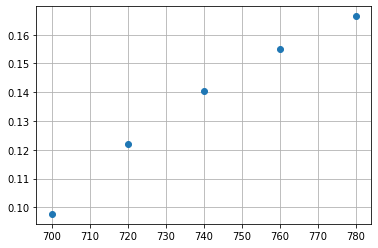

In [ ]:
import matplotlib.pyplot as plt

X = [700., 720., 740., 760.,780]
Y = [0.0977, 0.12184, 0.14060,0.15509,0.16643]


plt.plot(X, Y, "o") 
plt.grid()
plt.show()




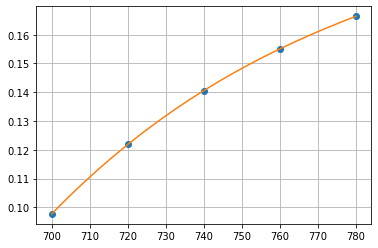

P( 750 ) = 0.148308984375


In [ ]:
import numpy as np

n = len(Y)

def calculaP(x):
    valor = 0
    for k in range(n):
        lk = 1.0
        for i in range(n):
            if k != i:
                lk = lk*(x - X[i])/(X[k]-X[i])
        valor = valor + Y[k]*lk 
    return valor

Ynew = []
Xnew = np.linspace(X[0], X[-1], num=21)
for xnew in Xnew:
    ynew = calculaP(xnew)
    Ynew.append(ynew)

plt.plot(X, Y, 'o', Xnew, Ynew,'-')
plt.grid()
plt.show()

x = 750
print ("P(",x,") =", calculaP(x))

###Usando a Fómula de Newton

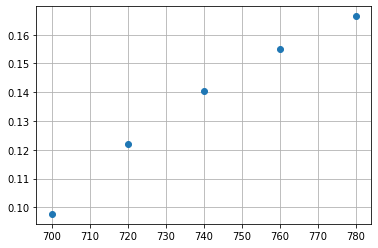

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


X = [700., 720., 740., 760.,780]
Y = [0.0977, 0.12184, 0.14060,0.15509,0.16643]

plt.plot(X, Y, "o") 
plt.grid()
plt.show()




In [ ]:
dd = [Y]   
n = len(X)
for o in range(1, n):
    dd.append([])
    for k in range(0, n-o):
        valor = (dd[o-1][k+1] - dd[o-1][k])/(X[k+o]-X[k])
        dd[o].append(valor)
def produtorio(x, n):
    prod = 1
    for i in range(n):
        prod = prod * (x - X[i])
    return prod

def calculaP1(x):
    soma = dd[0][0]
    for i in range(1, len(X)):
        soma = soma + produtorio(x,i)*dd[i][0]
    return (soma)

print("P(",x,") =",calculaP1(750))


P( 750 ) = 0.148308984375


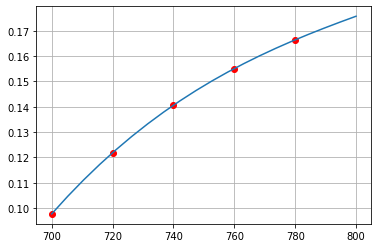

In [ ]:
Xp = np.linspace(700, 800, num=20)
Yp = []
for x in Xp:
    y = calculaP(x)
    Yp.append(y)
    
plt.plot(X, Y, 'ro', Xp, Yp,'-', )
plt.grid()
plt.show()

Observe que os valores aproximados obtidos com ambos os métodos são os mesmos, já que teremos o mesmo polinômio interpolador.

In [ ]:
print(calculaP1(750), calculaP(750))

0.148308984375 0.148308984375


# 2. 
**(a)** Pesquise a população aproximada atual do Brasil $P_0$ e os dados sobre números de **infectados** com coronavirus no Brasil desde 01 de março de 2020 até agosto de 2020, em intervalos aproximados  de 15 dias (pode usar por exemplo,  este site https://www.worldometers.info/coronavirus/country/brazil/ ).

**(b)** Ajuste os dados a um modelo da forma:
	$$y = \frac{P_0}{1-a_1 e^{-P_0 a_2 x}}$$ onde $P_0$ é uma estimativa da população do Brasil e $a_1, a_2$ são constantes. (**Dica:**  Para passar a um modelo linear calcule $\frac{y}{y-P_0}$).

**(c)** Calcule as projeções do modelo encontrado para os meses setembro, outubro e novembro em intervalos de 15 dias, e compare com os dados reais. Comente suas conclusões sobre  se seu modelo foi aproximado ou não aos valores reais para estes meses.


a) Segundo o site https://www.worldometers.info/coronavirus/country/brazil/, separando em intervalos $I_n$ indo de prmeiro de março até agosto, temos que

$I_1$ = 2,
$I_2$ = 200,
$I_3$ = 6880,
$I_4$ = 28610
$I_5$ = 92109,
$I_6$ = 218223,
$I_7$ = 529405,
$I_8$ = 891556,
$I_9$ = 1453369,
$I_{10}$ = 1970909,
$I_{11}$ = 2708876

b) Fazendo $\frac{P_0-y}{y}=z$ vem que $z = a_{1}e^{-a_{2}P_{0}x}$, portanto $\log{z} = \log{a_{1}} - a_{2}P_{0}\log{x}$. 

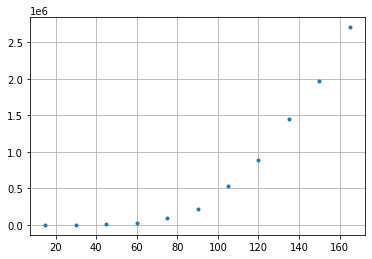

ln(p0 - f(x)) / f(x)):
[18.46469762 13.85952649 10.32143796  8.89619632  7.72667606  6.86352738
  5.97579954  5.45284634  4.96147173  4.65436446  4.33275461]
Gráfico com pontos linearizados


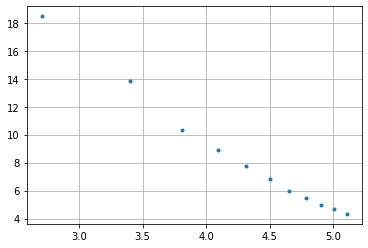

In [ ]:
import matplotlib.pyplot as plt
from scipy.linalg import solve
import numpy as np
p0 = 209000000

X = np.array([15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165])
Y = np.array([2, 200, 6880, 28610, 92109, 218223, 529405, 891556, 1453369, 1970909, 2708876])


plt.plot(X, Y, ".")
plt.grid()
plt.show()

z = (p0 - Y) / Y
Yr = np.log(z)
print("ln(p0 - f(x)) / f(x)):")
print (Yr)
print("Gráfico com pontos linearizados")
Xr = np.log(X)
plt.plot(Xr, Yr, ".")
plt.grid()
plt.show()

a1, a2:
[33.57466098 -5.87453838]
Gráfico da reta linearizado


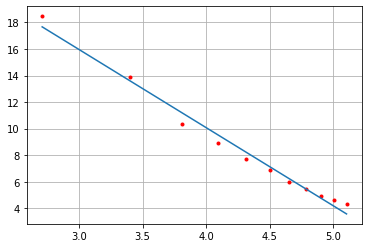

In [ ]:
A = np.array([[len(Xr), np.sum(Xr)],
              [np.sum(Xr), np.sum(Xr*Xr) ]])
B = np.array([np.sum(Yr), np.sum(Xr*Yr)])

#print (A)
#print (B)

a = solve(A, B)
print("a1, a2:")
print (a)



Xplot = np.linspace(Xr[0], Xr[-1], 100)
h = lambda X: a[0] + a[1]*X

print("Gráfico da reta linearizado")
plt.plot(Xr, Yr, "r.", Xplot, h(Xplot), "-")
plt.grid()
plt.show()

Gráfico da função exponencial


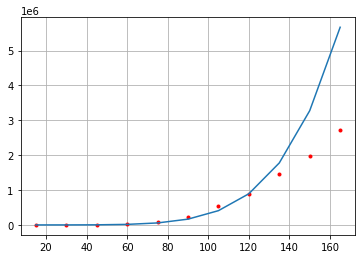

In [ ]:
a1 = - np.exp(a[0]) # que seria o "a"
a2 = - a[1] / p0
g = lambda x: p0/(1-a1*np.exp(-p0*a2*np.log(x))) 

print("Gráfico da função exponencial")
Xproj = np.linspace(15, 210, 100)
plt.plot(X, Y, "r.", X, g(X))
plt.grid()
plt.show()

c) Fazendo a projeçao dos próximos meses, temos o seguinte gráfico:

Gráfico da função exponencial


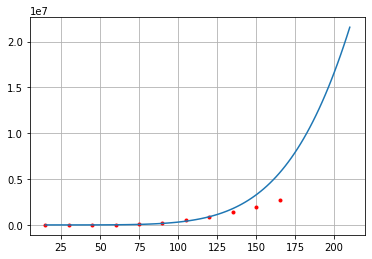

In [ ]:
print("Gráfico da função exponencial")
Xproj = np.linspace(15, 210, 100)
plt.plot(X, Y, "r.", Xproj, g(Xproj))
plt.grid()
plt.show()

Como podemos ver pela projeçao, os números da curva ultrapassam facilmente os dados obtidos do site para os meses de setembro, outubro e novembro. Entretanto, o modelo é uma aproximaçao muito boa nos meses iniciais. 

# 3.
Considere a função 
$$f(x)=\frac{3.21}{0.73 + 9.81x^2}$$

**a)** Aproxime o valor de $f(1.78)$ usando um polinômio interpolador de grau 3 no intervalo [1, 2] e compare com o valor da função. Mostre o gráfico do polinômio e da função nesse intervalo. 

**b)** Repita o item anterior, mas dessa vez utilize um polinômio de grau 10 no intervalo [-2,2] e comente o que você observou. 

**c)** Pesquise e responda o que é "Fenômeno de Runge".


###a) Tomaremos os valores de $x\in\{1,1+\dfrac{1}{3},1+\dfrac{2}{3},2\}$

Observe que gráfico da função que queremos aproximar é:

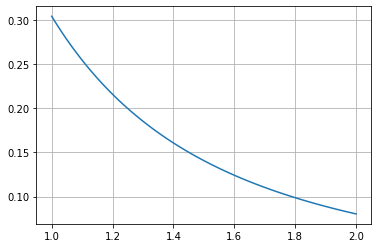

In [ ]:
f = lambda x: (3.21)/(0.73+9.81*x**2)

x = np.linspace(1, 2, num=100)

plt.plot( x, f(x),'-')
plt.grid()
plt.show()

In [ ]:
import numpy as np

X = np.linspace(1., 2.,num=4)
print(X)

Y = (3.21)/(0.73+(9.81*(X**2)))
print(Y)
n = len(Y)

def calculaP(x):
    valor = 0
    for k in range(n):
        lk = 1.0
        for i in range(n):
            if k != i:
                lk = lk*(x - X[i])/(X[k]-X[i])
        valor = valor + Y[k]*lk 
    return valor

Ynew = []
Xnew = np.linspace(X[0], X[-1], num=21)
for xnew in Xnew:
    ynew = calculaP(xnew)
    Ynew.append(ynew)



[1.         1.33333333 1.66666667 2.        ]
[0.30455408 0.17666483 0.1147248  0.08031023]


Dessa forma o gráfico do polinômio em azul e da função em vermelho fica:

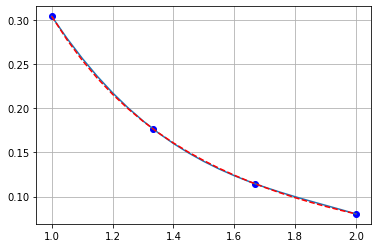

P( 1.78 ) = 0.10186113819231796


In [ ]:
f = lambda x: (3.21)/(0.73+9.81*x**2)
plt.plot(X, Y, 'bo', Xnew, Ynew,'-', Xnew, f(Xnew),'r--')
plt.grid()
plt.show()

x = 1.78
print ("P(",x,") =", calculaP(x))

Observe que os valores pra $x=1.78$ no polinômio e na função são respectivamente:

In [ ]:
f = lambda x: (3.21)/(0.73+9.81*x**2)
print ( calculaP(x), f(x))

0.10186113819231796 0.10090530605993887


###b)

Utilizando da mesma construção anterior, agora dividimos o intervalo em 10.

[-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]
[0.08031023 0.1242087  0.2160685  0.4580218  1.39589494 4.39726027
 1.39589494 0.4580218  0.2160685  0.1242087  0.08031023]
A representação gráfica do polinômio e da função é:


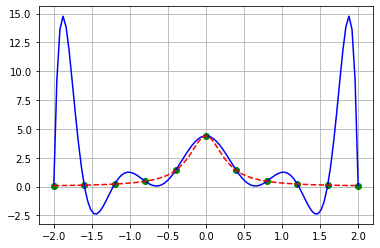

P( 1.78 ) = 10.598808760629598


In [ ]:
import numpy as np

X = np.linspace(-2., 2.,num=11)
print(X)

Y = (3.21)/(0.73+(9.81*(X**2)))
print(Y)
n = len(Y)

def calculaP(x):
    valor = 0
    for k in range(n):
        lk = 1.0
        for i in range(n):
            if k != i:
                lk = lk*(x - X[i])/(X[k]-X[i])
        valor = valor + Y[k]*lk 
    return valor

Ynew = []
Xnew = np.linspace(X[0], X[-1], num=100)
for xnew in Xnew:
    ynew = calculaP(xnew)
    Ynew.append(ynew)
f = lambda x: (3.21)/(0.73+9.81*x**2)
print("A representação gráfica do polinômio e da função é:")
plt.plot(X, Y, 'go', Xnew, Ynew,'b-', Xnew, f(Xnew),'r--')
plt.grid()
plt.show()

x = 1.78
print ("P(",x,") =", calculaP(x))



Observe que os valores pra $x=1.78$ no polinômio e na função são respectivamente:

In [ ]:
f = lambda x: (3.21)/(0.73+9.81*x**2)
print ( calculaP(x), f(x))

10.598808760629598 0.10090530605993887


Observe que pôlinomio não é o ideal para aproximar a função no ponto, já que o erro é muito grande entre os valores é grande.

###c) 
O fenômeno Runge ocorre quando tentamos aproximar uma função por um polinômio de grau relativamente grande. Ao analisarmos pontos próximos aos extremos do intervalo obteremos grandes erros, o que nos justifica que o polinômio não é uma boa aproximação para função próximo a esses pontos , mas para centro do intervalo teremos uma boa aproximação.


# 4.

Considere a função $f(t)=\frac{4t}{1+10t^2}$.

**(a)** Tomando $100$ pontos entre $t=0$ e $t=1$ da forma $(t, f(t))$,    use mínimos quadrados para calcular os polinômios $p_1(t), p_2(t), p_3(t), p_4(t)$, de graus $1,2,3,4$ respetivamente, que melhor se ajustam aos pontos dados.

**(b)** Para cada polinômio $p_i(t)$ esboce o gráfico de $p_i(t)$ junto com o gráfico de  $f(t)$.
	
**(c)** Calcule o erro médio quadrático (RMS)  em cada polinômio com relação ao dados de (a).   





n=1

Coeficientes da reta obtidos: 
 [[0.01394084]
 [0.46959485]]
O gráfico de f em vermelho e p_1 em azul


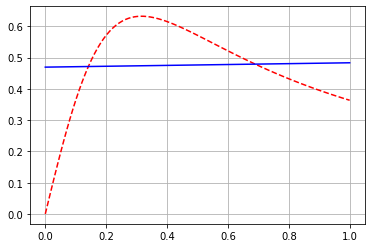

erro quadrático medio: 0.018230154249081584


In [ ]:
import numpy as np
import math
from scipy.linalg import solve
import matplotlib.pyplot as plt

f = lambda x: (4*x)/(1+10*(x**2))

X = np.linspace(0,1,100)

Y = []
w = []
for i in range(0,100):
    fdeX = f(X[i])
    Y.append(fdeX)

## AJUSTE DE CURVAS LINEAR DISCRETO
## A*alpha = b
## Calcular os elementos da matriz A:
a11 = np.sum(X*X)
a12 = np.sum(X)
a21 = a12
a22 = len(X)

## Definir b:
b1 = np.sum(X*Y)
b2 = np.sum(Y)

## Montar o sistema e resolvê-lo:
A = np.array([[a11, a12],
              [a21, a22]])

b = np.array([[b1],
              [b2]])

alpha = solve(A, b)
print('Coeficientes da reta obtidos: \n', alpha)


## Definir função, como o ajuste é linear, a função g(x) que queremos aproximar é do tipo:
g = lambda x: alpha[0]*x + alpha[1]

## Para plotar o gráfico da função linear g(x) aproximada:
Xplot = np.arange(X[0], X[-1] + 1, 1)
Yplot = []

for x in Xplot:
    Yplot.append(g(x))
print("O gráfico de f em vermelho e p_1 em azul" )   
plt.plot(X, Y, "r--", Xplot, Yplot, "b-")
plt.grid()
plt.show()
W=[]
for j in range(0,100):
    H = (g(X[j])-(f(X[j])))**2
    W.append(H)
S=np.sum(W)
print('erro quadrático medio:',0.01*S)

n=2

coeficientes do polinômio de grau 2: [-1.47029498  1.48423582  0.22702093]
O gráfico de f em vermelho e p_2 em azul


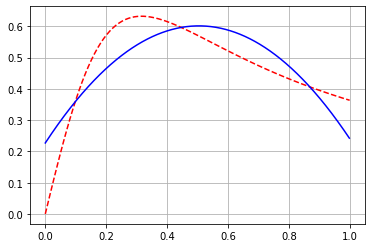

erro quadrático medio: 0.0057339394388645475


In [ ]:


a11 = np.sum(X**4)
a12 = np.sum(X**3)
a13 = np.sum(X**2)
a21 = a12
a22 = a13
a23 = np.sum(X)
a31 = a13
a32 = a23
a33 = len(X)
b1 = np.sum(Y*X**2)
b2 = np.sum(Y*X)
b3 = np.sum(Y)

A = np.array([[a11, a12, a13],
              [a21, a22, a23],
              [a31, a32, a33]])
B = np.array([b1, b2, b3])
a = solve(A,B)
print('coeficientes do polinômio de grau 2:',a)

Xr = np.arange(0,1,0.001)
def g(x):
    return a[0]*x**2 + a[1]*x + a[2]
print("O gráfico de f em vermelho e p_2 em azul" )
plt.plot(X, Y, "r--", Xr, g(Xr),'b-')
plt.grid()
plt.show()
W=[]
for j in range(0,100):
    H = (g(X[j])-(f(X[j])))**2
    W.append(H)
S=np.sum(W)
print('erro quadrático medio:',0.01*S)

n=3

coeficientes do polinômio de grau 3: [ 3.67891546 -6.98866817  3.68051194  0.04861173]
O gráfico de f em vermelho e p_3 em azul


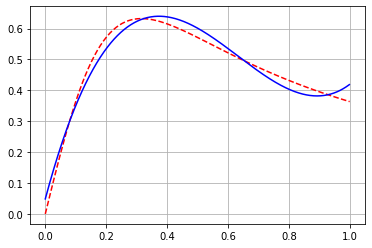

erro quadrático medio: 0.0006069527300080064


In [ ]:


a11 = np.sum(X**6)
a12 = np.sum(X**5)
a13 = np.sum(X**4)
a14= np.sum(X**3)
a21 = a12
a22 = a13
a23 = a14
a24 = np.sum(X**2)
a31 = a13
a32 = a23
a33 = a24
a34 = np.sum(X)
a41 = a32
a42 = a33
a43 = a34
a44= len(X)

b1=np.sum(Y*(X**3))
b2=np.sum(Y*(X**2))
b3=np.sum(Y*(X))
b4=np.sum(Y)

A = np.array([[a11, a12, a13, a14],
              [a21, a22, a23, a24],
              [a31, a32, a33, a34],
              [a41, a42, a43, a44]])
B = np.array([b1, b2, b3, b4])
a = solve(A,B)
print('coeficientes do polinômio de grau 3:',a)

Xr = np.arange(0,1,0.001)
def g(x):
    return a[0]*x**3 + a[1]*x**2 + a[2]*x + a[3]
print("O gráfico de f em vermelho e p_3 em azul" )
plt.plot(X, Y, "r--", Xr, g(Xr),'b-')
plt.grid()
plt.show()
W=[]
for j in range(0,100):
    H = (g(X[j])-(f(X[j])))**2
    W.append(H)
S=np.sum(W)
print('erro quadrático medio:',0.01*S)

n=4

coeficientes do polinômio de grau 4: [ -4.87636264  13.43164074 -13.23752286   5.053004    -0.01690639]
O gráfico de f em vermelho e p_4 em azul


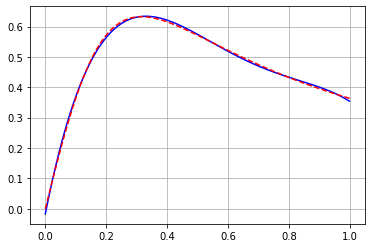

erro quadrático medio: 2.4355800825013077e-05


In [ ]:

c11 = np.sum(X**8)
c12 = np.sum(X**7)
c13 = np.sum(X**6)
c14 = np.sum(X**5)
c15 = np.sum(X**4)
c21 = c12
c22 = c13
c23 = c14
c24 = c15
c25 = np.sum(X**3)
c31 = c22
c32 = c23
c33 = c24
c34 = c25
c35 = np.sum(X**2)
c41 = c32
c42 = c33
c43 = c34
c44 = c35
c45 = np.sum(X)
c51 = c42
c52 = c43
c53 = c44
c54 = c45
c55 = len(X)

d1 = np.sum(Y*(X**4))
d2 = np.sum(Y*(X**3))
d3 = np.sum(Y*(X**2))
d4 = np.sum(Y*(X))
d5 = np.sum(Y)

C = np.array([[c11, c12, c13, c14, c15],
              [c21, c22, c23, c24, c25],
              [c31, c32, c33, c34, c35],
              [c41, c42, c43, c44, c45],
              [c51, c52, c53, c54, c55]])
D = np.array([d1, d2, d3, d4, d5])
d = solve(C,D)
print('coeficientes do polinômio de grau 4:',d)

Xr = np.arange(0,1,0.001)
def r(x):
    return d[0]*x**4 + d[1]*x**3 + d[2]*x**2 + d[3]*x+ d[4]
print("O gráfico de f em vermelho e p_4 em azul" )
plt.plot( Xr, r(Xr),'b-',X, Y, "r--")
plt.grid()
plt.show()
W=[]
for j in range(0,100):
    H = (r(X[j])-(f(X[j])))**2
    W.append(H)
S=np.sum(W)
print('erro quadrático medio:',0.01*S)

Observe que o polinômio de grau 4 é o que melhor aproxima função.

# 5.
Encontre a função do tipo $g(x)=a_1x + a_2 sen(x)$ que melhor se ajusta aos pontos tabelados abaixo. Faça o gráfico da função obtida juntamente com os pontos para visualizar o resultado.

\begin{array}{|l|l|l|l|l|l|l|l|l|l|}
		\hline
		x_i    &0.01     &0.99      &2.02      &3.01     &3.97      &5.01      &5.93     &6.99     &8.08 \\ \hline
		f(x_i) &0.000 &1.621  &1.782  &0.915 &-0.122 &-0.225 &1.093 &2.748 &3.534\\ \hline
	\end{array}


Observe que teremos a seguinte dispersão dos pontos:

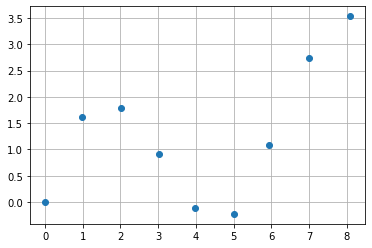

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([0.01, 0.99, 2.02, 3.01, 3.97, 5.01, 5.93, 6.99, 8.08])
Y = np.array([0.0, 1.621, 1.782, 0.915, -0.122,-0.225, 1.093, 2.748, 3.534])


plt.plot(X, Y, "o") 
plt.grid()
plt.show()

In [ ]:
from scipy.linalg import solve

# Calcula os elementos das marizes
g1 = lambda X: X
g2 = lambda X: np.sin(X)

print (g1(X))
a11 = np.sum(np.multiply(g1(X),g1(X)))
a12 = np.sum(np.multiply(g1(X),g2(X)))
a21 = a12
a22 = np.sum(np.multiply(g2(X),g2(X)))

print (a11, a12, a22)

b1 = np.sum(np.multiply(Y,g1(X)))
b2 = np.sum(np.multiply(Y,g2(X)))

print (b1,b2)




[0.01 0.99 2.02 3.01 3.97 5.01 5.93 6.99 8.08]
204.29309999999998 5.690032772910694 4.47581088342997
60.591719999999995 8.236130780231512


In [ ]:
A = np.array([[a11, a12],
              [a21, a22]])

B = np.array([b1,b2])

a = solve(A, B)
print ("Os valores para a1 e a2 que aparecem na função são ",a, ",respectivamente.")



Os valores para a1 e a2 que aparecem na função são  [0.25434583 1.51679659] ,respectivamente.


Portanto $g(x)=0.25434583x+1.51679659 \ sin(x)$

A gráfico de $g(x)$ é:

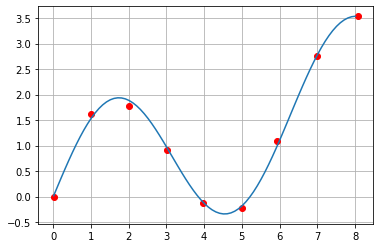

In [ ]:
g = lambda X: a[0]*g1(X)+a[1]*g2(X)

Xr = np.arange(X[0], X[-1], 0.1)
Yr = g(Xr)   


plt.plot(X, Y, "ro", Xr, Yr, "-") 
plt.grid()
plt.show()

Observe que é uma boa aproximação para os pontos dados.